In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas
from statannot import add_stat_annotation

# Load data

In [2]:
data_actin = pandas.read_csv(r'Data\Fig_2_S2_Actin.csv')
data_pi = pandas.read_csv(r'Data\Fig_2_S2_Pi.csv')

# Number CTL (actin data)

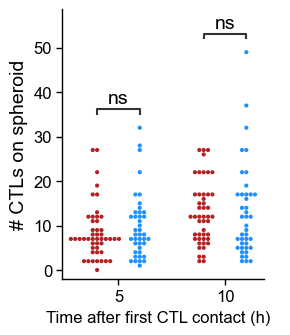

In [3]:
# Define font
plt.rc('font',family='Arial')

# Plot
fig, ax = plt.subplots(1, figsize = (2.6,3.5))

ax.set_ylim(-2,50)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.tick_params(axis='x', labelsize=14, rotation=0)
ax.tick_params(axis='y', labelsize=14)        
ax.tick_params(width=1, length=4)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1)

sns.swarmplot(ax = ax, data=data_actin,
              hue='type',
              y='nb_ctl',
              x= 'time_after_contact',
              color = 'k',
              size = 3,
              alpha = 1,
              dodge=True,
              palette = ['firebrick','dodgerblue'],
              label = None)

add_stat_annotation(ax,
                    data=data_actin,
                    hue='type',
                    y='nb_ctl',
                    x = 'time_after_contact',
                    box_pairs=[((5, 'WT'), (5,'APC')),((10, 'WT'), (10,'APC'))],
                    test = 'Mann-Whitney',
                    fontsize = 14,
                    comparisons_correction=None, 
                    text_format='star',
                    loc='inside',
                    verbose=0)

ax.tick_params(axis="x", labelsize=12) 
ax.tick_params(axis="y", labelsize=12) 
ax.set_xlabel('Time after first CTL contact (h)  ', fontsize=12)
ax.set_ylabel('# CTLs on spheroid', fontsize=14)
ax.get_legend().remove()
plt.show()

# Number CTL (PI data)

C:\Users\vabonnet\AppData\Local\miniconda3\envs\APC\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
C:\Users\vabonnet\AppData\Local\miniconda3\envs\APC\lib\site-packages\ipykernel_launcher.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator


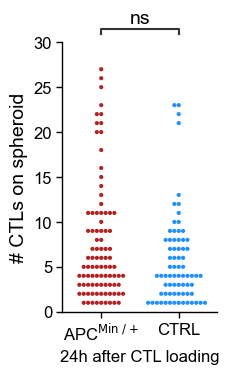

In [4]:
plt.rc('font',family='Arial')
fig, ax = plt.subplots(1, figsize = (2,3.5))

ax.set_ylim(0,30)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.tick_params(axis='x', labelsize=12, rotation=0)
ax.tick_params(axis='y', labelsize=12)        
ax.tick_params(width=1, length=4)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1)

order = ['APC', 'WT']
    
sns.swarmplot(ax = ax,
              data=data_pi.loc[(data_pi.type != 'control')],
              x = 'type',
              y='nb_CTL',
              order = order,
              dodge = False,
              size = 3,
              palette = ['firebrick','dodgerblue'],
              color = 'k')

add_stat_annotation(ax = ax,
                    data=data_pi.loc[(data_pi.type != 'control')],
                    x='type',
                    y='nb_CTL',
                    order = order,
                    fontsize = 14,
                    box_pairs=[('APC', 'WT')],
                    test='t-test_welch',
                    text_format='star',
                    loc='outside',
                    verbose=0)

ax.set_ylabel('# CTLs on spheroid', fontsize=14)
ax.set_xlabel('24h after CTL loading', fontsize=12)
labels = [r'APC$^{\mathrm{Min}\ /+}$', 'CTRL']
ax.set_xticklabels(labels)
plt.show()